## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Import Data

In [4]:
# list cols to use
use_cols = ['ride_id', 'started_at', 'ended_at', 'start_station_name', 'end_station_name', 'member_casual', 'date', 'avgTemp']

# import data
df = pd.read_csv('ny_data.csv',
usecols=use_cols, # import only specified columns
parse_dates=['started_at', 'ended_at', 'date'], # set these col as datetime dtype
low_memory=False)

In [5]:
df.head()

,ride_id,started_at,ended_at,start_station_name,end_station_name,member_casual,date,avgTemp
0,BFD29218AB271154,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,Mt Morris Park W & W 120 St,member,2022-01-21,-6.0
1,7C953F2FD7BE1302,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,Boerum Pl\t& Pacific St,member,2022-01-10,1.6
2,95893ABD40CED4B8,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,5 Ave & E 29 St,member,2022-01-26,-2.3
3,F853B50772137378,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,5 Ave & E 29 St,member,2022-01-03,1.4
4,7590ADF834797B4B,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,5 Ave & E 29 St,member,2022-01-22,-5.9


In [6]:
df.dtypes

ride_id                       object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
end_station_name              object
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
dtype: object

## Visualizations

#### Group by 'date' for daily summary ----

In [7]:
# create new df groups by date and shows the ride count & avg temp per day
daily_df = df.groupby('date').agg({
    'ride_id':'count', # the daily ride count
    'avgTemp':'mean' #the average daily temperature
}).reset_index()

In [8]:
daily_df.head()

,date,ride_id,avgTemp
0,2021-01-30,1,NaN
1,2021-02-15,1,NaN
2,2021-03-11,1,NaN
3,2021-03-14,1,NaN
4,2021-03-31,1,NaN


In [10]:
daily_df['avgTemp'].value_counts(dropna= False)

avgTemp
 NaN     37
 11.6     5
 10.4     5
 21.8     5
 25.6     4
         ..
 1.0      1
 3.8      1
 7.5      1
-11.7     1
-6.9      1
Name: count, Length: 237, dtype: int64

#### Create Dual Axis Line Chart ----

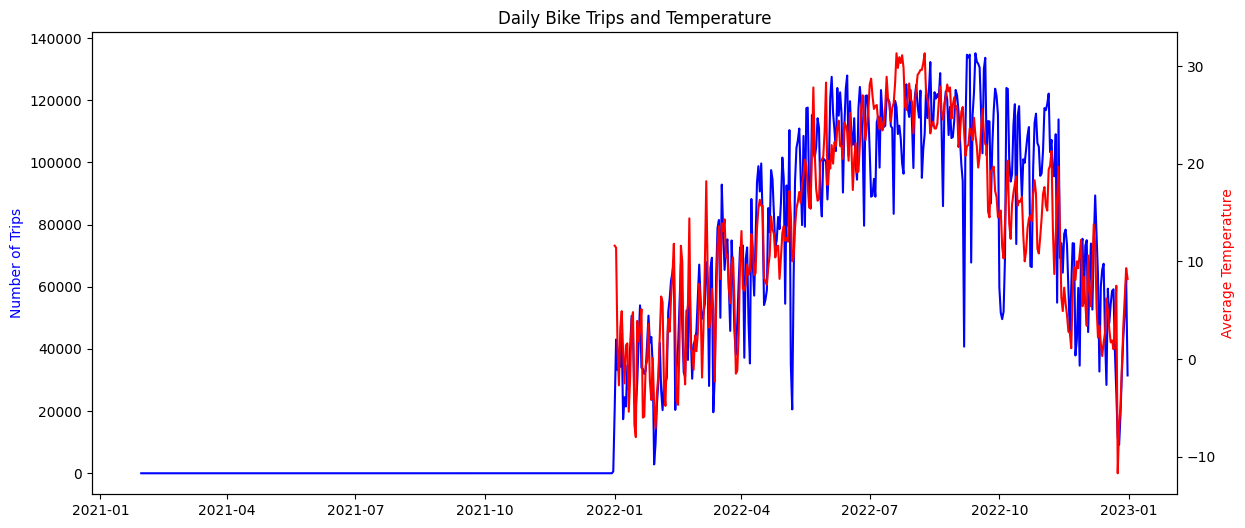

In [22]:
fig, ax1 = plt.subplots(figsize=(14,6))

# set 1st y-axis: number of trips
ax1.plot(daily_df['date'], daily_df['ride_id'], color='blue')
ax1.set_ylabel('Number of Trips', color='blue')

# set 2nd y-axis: average temperature 
ax2 = ax1.twinx() # create 2nd y-axis that share the same x-axis as ax1
ax2.plot(daily_df['date'], daily_df['avgTemp'], color='red')
ax2.set_ylabel('Average Temperature', color='red')

plt.title('Daily Bike Trips and Temperature')
plt.show()

**Create chart that only focuses on the year 2022**

In [23]:
# create new df that filters for only data during the year 2022
mask = (daily_df['date'] >= '2022-01-01') & (daily_df['date'] <= '2022-12-31')
filtered_df = daily_df[mask]

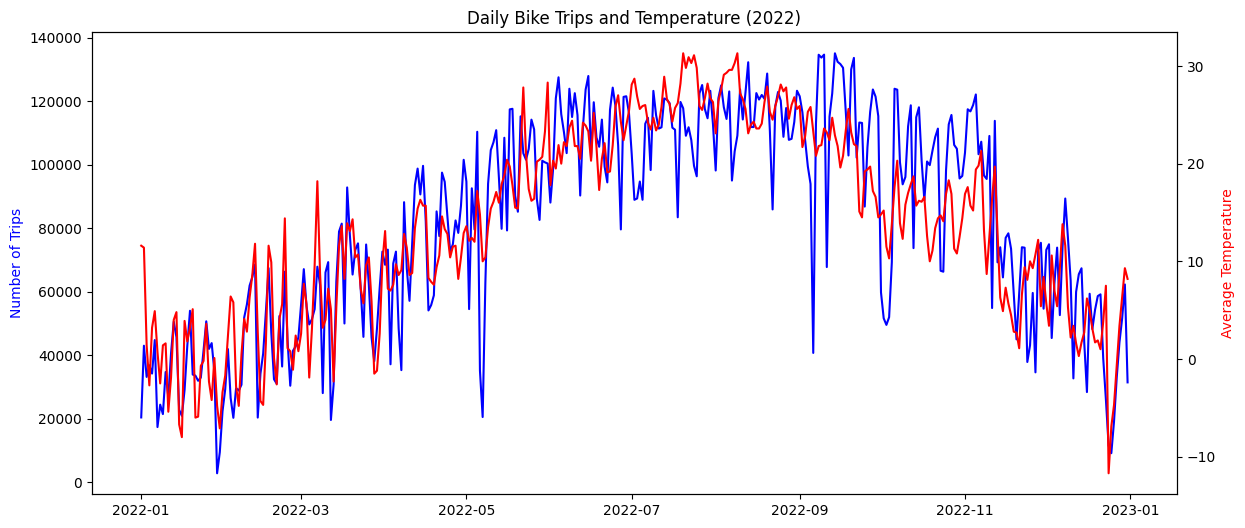

In [24]:
# create chart using new filtered df

fig, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(filtered_df['date'], filtered_df['ride_id'], color='blue')
ax1.set_ylabel('Number of Trips', color='blue')

ax2 = ax1.twinx()
ax2.plot(filtered_df['date'], filtered_df['avgTemp'], color='red')
ax2.set_ylabel('Average Temperature', color='red')

plt.title('Daily Bike Trips and Temperature (2022)')
plt.show()


**Insights:** There is a positive correlation between 'Number of Trips' and the 'Average Tempurature'. As the temperature increases, so does the number of trips; as the temperature decreases, so does the number of trips.